In [1]:
# Sumber Data : https://www.kaggle.com/sharanmk/bank-marketing-term-deposit

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [42]:
dataset = pd.read_csv("bank_customer_survey.csv")
dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [44]:
#Menghapus kolom yang tidak perlu
cols = [1,2,3,4,7,8,9,10,11,12,13,14,15]
dataset.drop(dataset.columns[cols], inplace=True, axis=1)
dataset

,age,balance,housing,y
0,58,2143,yes,0
1,44,29,yes,0
2,33,2,yes,0
3,47,1506,yes,0
4,33,1,no,0
...,...,...,...,...
45206,51,825,no,1
45207,71,1729,no,1
45208,72,5715,no,1
45209,57,668,no,0


No handles with labels found to put in legend.


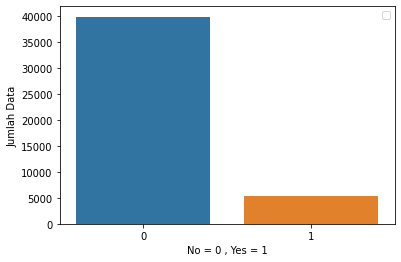

In [45]:
sns.countplot(x='y', data=dataset)

plt.xlabel('No = 0 , Yes = 1')
plt.ylabel('Jumlah Data')
plt.legend()
plt.show()

In [47]:
x = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values

In [48]:
print(x)

[[  58 2143]
 [  44   29]
 [  33    2]
 ...
 [  72 5715]
 [  57  668]
 [  37 2971]]


In [49]:
print(y)

[0 0 0 ... 1 0 0]


In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [51]:
print(x_train)

[[  39 3870]
 [  31 1073]
 [  36  886]
 ...
 [  35  323]
 [  70  616]
 [  46   57]]


In [52]:
len(x_train)

33908

In [53]:
print(x_test)

[[  37 1403]
 [  36 -253]
 [  47 -406]
 ...
 [  37    0]
 [  41  636]
 [  49 4751]]


In [54]:
len(x_test)

11303

In [55]:
print(y_train)

[0 0 0 ... 1 0 0]


In [56]:
len(y_train)

33908

In [57]:
print(y_test)

[0 1 0 ... 0 0 1]


In [58]:
len(y_test)

11303

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [60]:
print(x_train)

[[-0.18276354  0.80402975]
 [-0.93754659 -0.09711178]
 [-0.46580719 -0.15735971]
 ...
 [-0.56015507 -0.33874787]
 [ 2.74202077 -0.2443487 ]
 [ 0.47767162 -0.42444813]]


In [61]:
print(x_test)

[[-0.3714593   0.0092081 ]
 [-0.46580719 -0.52432439]
 [ 0.5720195  -0.57361815]
 ...
 [-0.3714593  -0.44281248]
 [ 0.00593222 -0.23790507]
 [ 0.76071527  1.08787161]]


In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y_pred = classifier.predict(x_test)

In [64]:
datasety = pd.DataFrame({'Data Asli Deposito':y_test,'Data Prediksi Deposito':y_pred})
datasety

,Data Asli Deposito,Data Prediksi Deposito
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
11298,0,0
11299,0,0
11300,0,0
11301,0,0


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[9731  247]
 [1212  113]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


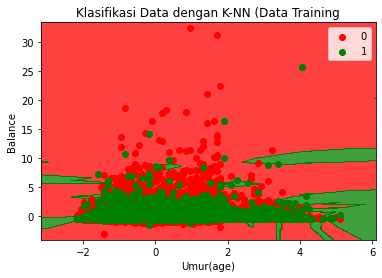

In [66]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Training')
plt.xlabel('Umur(age)')
plt.ylabel('Balance')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


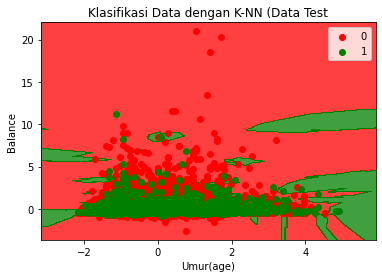

In [67]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan K-NN (Data Test')
plt.xlabel('Umur(age)')
plt.ylabel('Balance')
plt.legend()
plt.show()